This Notebook contains the code used to generate the results and figures related to the comparison between rank metrics

# Environment settings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 14,
})

# Rank metrics

In [ ]:
def create_noisy_low_rank_matrix(N, r, gamma):
    """
    Create a noisy low-rank matrix of size NxN with rank r and noise level gamma
    """
    A = np.random.normal(0, 1, (N, r))
    M = A @ A.T
    noise = np.random.normal(0, 1, (N, N))
    X = (1-gamma)*M + gamma*noise
    return X

def create_rho_matrix(rho, N):
    """
    Create an NxN diagonal matrix with geometrically decaying singular values.
    The i-th diagonal entry is rho^i (for i=1 to N)

    Parameters:
    - rho (float): base of the geometric decay
    - N (int): size of the matrix.

    Returns:
    - A (np.ndarray): NxN matrix with decaying singular values
    """
    diag_entries = np.array([rho**i for i in range(1, N + 1)])
    A = np.diag(diag_entries)
    return A

def analyze_matrix(M, metric='stable_rank'):
    """
    Computes a specified metric for a matrix M

    Parameters:
    - M : numpy.ndarray, input matrix (m x n)
    - metric : str, options:
        - 'stable_rank'
        - 'nuclear_norm'
        - 'numerical rank'
        - 'effective_rank'

    Returns:
    - Computed metric value (float or None if invalid)
    """
    m, n = M.shape
    sv = svd(M, compute_uv=False)  # Singular values (sorted in descending order)
    spectral_norm = sv[0] if len(sv) > 0 else 0  #largest singular value

    #Compute selected metric
    elif metric == 'stable_rank':
        return np.sum(sv**2) / (spectral_norm**2) if spectral_norm > 0 else 0

    elif metric == 'numerical rank':
        return np.linalg.matrix_rank(M)

    elif metric == 'nuclear_norm':
        return np.sum(sv)

    elif metric == 'effective_rank':
        total = np.sum(sv)
        if total == 0:
            return 0
        p = sv / total
        entropy = -np.sum(p * np.log(p + 1e-12))
        return np.exp(entropy)

    else:
        raise ValueError(
            f"Unknown metric: {metric}. Valid options are: "
            "'stable_rank', 'nuclear_norm',
            "'numerical rank', 'effective_rank'"
        )


In [ ]:
#Rank metric values on some specific matrices
A1 = np.eye(3)

A2 = 2*np.eye(3)


A3 = np.array([[2, 0, 0],
               [0, 1, 0],
               [0, 0, 1]])

A4 = np.array([[1, 0, 0],
               [0, 2, 0],
               [0, 0, 2]])


A5 = np.array([[1, 1, 1],
               [1e-16, 0, 0],
               [0, 0, 0]])

A6 = np.array([[1, 1, 1],
               [1e-2, 0, 0],
               [0, 0, 0]])

alpha = 0
A_ = np.array([A1, A2, A3, A4, A5, A6])

metrics = ['stable_rank', 'nuclear_norm', 'numerical rank', 'effective_rank']
for A in A_ :
  for metric in metrics :
    v = analyze_matrix(A, metric=metric)
    print(f'{metric} : {v}')
  print('\n')

stable_rank : 3.0
nuclear_norm : 3.0
numerical rank : 3
effective_rank : 2.999999999991


stable_rank : 3.0
nuclear_norm : 6.0
numerical rank : 3
effective_rank : 2.999999999991


stable_rank : 1.5
nuclear_norm : 4.0
numerical rank : 3
effective_rank : 2.828427124737705


stable_rank : 2.25
nuclear_norm : 5.0
numerical rank : 3
effective_rank : 2.8717458874839723


stable_rank : 1.0
nuclear_norm : 1.7320508075688772
numerical rank : 1
effective_rank : 0.9999999999990012


stable_rank : 1.0000222217283923
nuclear_norm : 1.7402253507081957
numerical rank : 2
effective_rank : 1.030287948956803




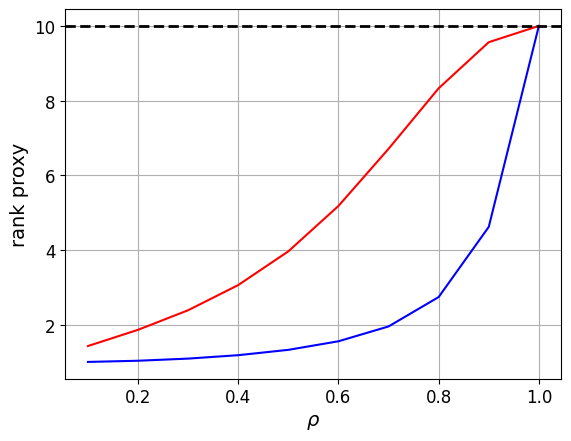

In [ ]:
#The results are generated for NxN matrices
N = 10
sr, er, x_lab = [], [], []
rhos = range(1, 11, 1)

for rho in rhos :
  rho = rho/10
  A = create_rho_matrix(rho, N)

  sr.append(analyze_matrix(A, metric='stable_rank'))
  er.append(analyze_matrix(A, metric='effective_rank'))
  x_lab.append(rho)

plt.plot(x_lab, sr, color='blue')
plt.plot(x_lab, er, color='red')
plt.axhline(y=N, color='black', linestyle='--', linewidth=2)
plt.xlabel(r'$\rho$')
plt.ylabel('rank proxy')
plt.grid()
plt.show()

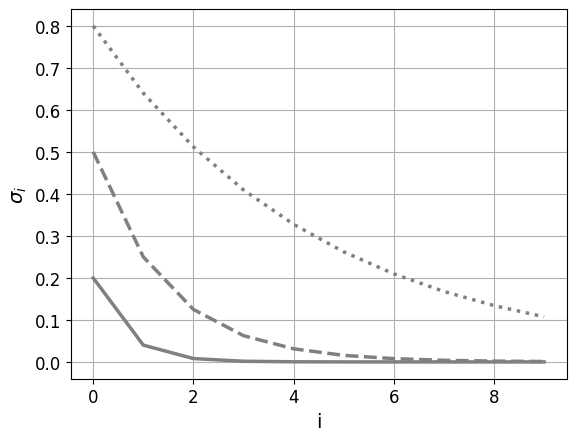

In [ ]:
#The results are generated for NxN matrices
N = 10

A = create_rho_matrix(0.2, N)
plt.plot(svd(A, compute_uv=False), color='gray', linestyle='solid', linewidth=2.5)

A = create_rho_matrix(0.5, N)
plt.plot(svd(A, compute_uv=False), color='gray', linestyle='dashed', linewidth=2.5)

A = create_rho_matrix(0.8, N)
plt.plot(svd(A, compute_uv=False), color='gray', linestyle='dotted', linewidth=2.5)

plt.xlabel('i')
plt.ylabel(r'$\sigma_i$')
plt.grid()
plt.show()